# Predicting what drives the price of a car?

**OVERVIEW**

In this notebook we will explore and provide an in-depth analyis of a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars. The smaller dataset ensures speed of processing.  

**Goal of Analysis**

The goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem. 

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>

Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Problem Definition

In a statement,
> Given key parameters about used cars, can we predict whether or not they are valuable to used car buyers?

To maximize profits a used car dealership must not only house a healthy inventory of cars with competitive prices but also a car inventory that posses features, which customers of different backgrounds consider valuable for purchase. To increase the likelyhood of purchase the used car agency must build the correct type of inventory using as reference the analysis of reliable data and sale predictions.   

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.

The attributes of this data set include:

### Preparing the tools
We are going to use pandas, Matplotlib, sklearn and numpy for data analysis and manipulation.

#### Library Imports

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from numpy import arange
from pandas import read_csv
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel, RFE
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, LinearRegression , Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder, PolynomialFeatures

pd.set_option('display.max_columns', None)

#### Load the Data

In [29]:
data = pd.read_csv('data/vehicles.csv')

### Data Exploration
**Goal** Understand the data set, sanitize the data and become an expert on its details. The intent is to answer the main key question:

**What drives the price of a car?**

As part of the data exploration the following questions come to mind:
 - What features have strong correlation with the prices?
     - Does the type of transmission have an impact in price?
     - Is the number of cylinders impact price?
 - Are there any features with missing values?
 - What data types does the dataset have available?
 - Do we have categorical features? Do any of them need to be encoded?
 - How do we make projections on profits based on the base purchase price of the car (i.e. the price the Agency paid for the car)?


In [30]:
# What is the shape of our dataset (rows, columns)
data.shape

(426880, 18)

In [31]:
# Any obvious numerical correlations?
data.corr()

,id,price,year,odometer
id,1.000000,-0.002779,-0.059040,0.010721
price,-0.002779,1.000000,-0.004925,0.010032
year,-0.059040,-0.004925,1.000000,-0.157215
odometer,0.010721,0.010032,-0.157215,1.000000


**OBSERVATION:** The only numerical values are id, price, year and odometer. The data shows the following correlations with regards to price:
- little correlation with ID (at ~ -0.00278),  
- little stronger correlation with the year (at ~ -0.00493)
- stronger positive correlation with odometer (at ~ 0.010032)

In [32]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [33]:
# What columns/features do we have present and their type? Are there any null values?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

**OBSERVATION:** No null values but is there missing data?

In [34]:
# Does the dataset have missing or problematic data?
data.isna().sum().sort_values(ascending=False)
# or data.isnull().sum().sort_values(ascending=False)

size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
id                   0
region               0
price                0
state                0
dtype: int64

In [60]:
car_title_status = data[data['title_status'] != "clean"]
car_title_status.groupby('title_status')['id'].count()

title_status
lien          1422
missing        814
parts only     198
rebuilt       7219
salvage       3868
Name: id, dtype: int64

In [38]:
# Do we have unique values in the columns
data.nunique(axis=0).sort_values(ascending=False)

id              426880
VIN             118246
odometer        104870
model            29649
price            15655
region             404
year               114
state               51
manufacturer        42
type                13
paint_color         12
cylinders            8
condition            6
title_status         6
fuel                 5
size                 4
transmission         3
drive                3
dtype: int64

In [40]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [41]:
data.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [73]:
# Get numeric columns
cols = data.columns
num_cols = data._get_numeric_data().columns
num_cols

Index(['id', 'price', 'year', 'odometer'], dtype='object')

In [77]:
# Categoricl columns
data.select_dtypes(include=['object']).columns.tolist()

['region',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

In [82]:
# Check the unique values for each categorical feature
for f in data.select_dtypes(include=['object']).columns.tolist():
    print(f'Feature: {f}')
    print(data[f].unique())

Feature: region
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 'colorado

In [72]:
# How many older cars (year 1999 and earlier) do we have in this dataset?
cars_years = data[data['year'] <= 1999 ]
cars_years.groupby('year')['id'].count()

year
1900.0      12
1901.0       3
1902.0       1
1903.0      12
1905.0       1
          ... 
1995.0    1246
1996.0    1302
1997.0    1724
1998.0    1988
1999.0    3094
Name: id, Length: 91, dtype: int64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [61]:
# Curious, what are the % of missing values in each column for this dataset?
percent_of_data_missing = data.isnull().mean().round(4).mul(100).sort_values(ascending=False)
percent_of_data_missing

size            71.77
cylinders       41.62
condition       40.79
VIN             37.73
drive           30.59
paint_color     30.50
type            21.75
manufacturer     4.13
title_status     1.93
model            1.24
odometer         1.03
fuel             0.71
transmission     0.60
year             0.28
id               0.00
region           0.00
price            0.00
state            0.00
dtype: float64

In [85]:
data.isnull().sum().sort_values(ascending=False)

size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
id                   0
region               0
price                0
state                0
dtype: int64

#### Converting data types to easier to analyze data types

In [86]:
# The unique values above for categorical data 'cylinders' showed entries that can easily be converted to integers
data['cylinders'].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [95]:
data['cylinders'].value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

In [106]:
# Let's ignore 'other' entry for cylinders and replace all Nan values with 0.
data = data[data['cylinders'] != 'other']
data['cylinders'].fillna(0, inplace=True)

In [117]:
# Now let's convert the cylinders feature to integer values.
mapping = {'3 cylinders': 3,'4 cylinders': 4,'5 cylinders': 5,  '6 cylinders': 6, '8 cylinders': 8,'10 cylinders':10,
          '12 cylinders': 12, '0': 0}

data = data.replace({'cylinders': mapping})

In [119]:
data['cylinders'].info()

<class 'pandas.core.series.Series'>
Int64Index: 425582 entries, 0 to 426879
Series name: cylinders
Non-Null Count   Dtype
--------------   -----
425582 non-null  int64
dtypes: int64(1)
memory usage: 22.6 MB


In [121]:
# Now let's convert all those zeros (previously NaNs) to the most common value, which is 6 cylinders 
# since the amount of zeros is high.
data['cylinders'].value_counts()

0     177678
6      94169
4      77642
8      72062
5       1712
10      1455
3        655
12       209
Name: cylinders, dtype: int64

In [122]:
# Lets do the value replacement in place
data.loc[data['cylinders'] == 0, 'cylinders'] = 6
data['cylinders'].value_counts()

6     271847
4      77642
8      72062
5       1712
10      1455
3        655
12       209
Name: cylinders, dtype: int64

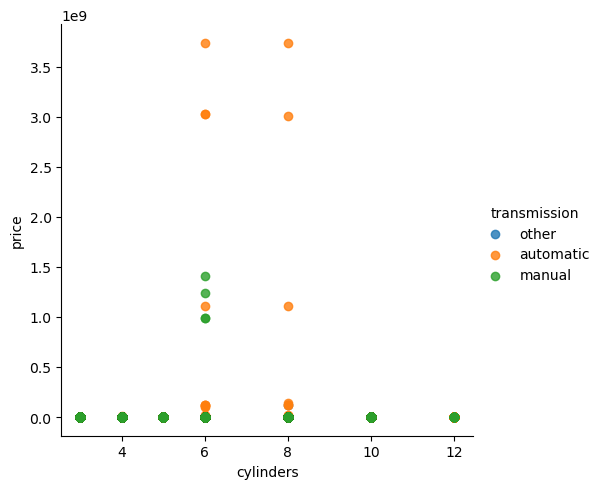

In [132]:
sns.lmplot(data=data, x='cylinders', y='price',hue='transmission', fit_reg=False)

#### Dealing with our missing data -- drop, replace, other...

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
df.head()

In [ ]:
# split the data into X and y

In [ ]:
X

In [ ]:
y

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.